# Exploratory data analysis

## 1. Dataset description

1) Global COVID-19 datasets

- The two COVID-19 datasets, [the global confirmed dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) and [the global death dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv), are from the [data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). The dataset is updated everyday starting from January 22nd, 2020.

- Both datasets contain columns of location information (`Province/State`, `Country/Region`, `Lat`, and `Long`) or daily accumulated number of confirmed or deaths in the corresponding location, starting from `1/22/20` to present.

- As stated in the dataset repository, "Australia, Canada and China are reported at the province/state level. Dependencies of the Netherlands, the UK, France and Denmark are listed under the province/state level. The US and other countries are at the country level."

- The datasets combine data from multiple sources and may contain mistakes.

2) Country statistics datasets

+ [Population ages 65 and above (% of total population)](https://data.worldbank.org/indicator/SP.POP.65UP.TO.ZS) from the [World Bank Open Data](https://data.worldbank.org/).

+ [Population ages 15-64 (% of total population)](https://data.worldbank.org/indicator/SP.POP.1564.TO.ZS) from the World Bank Open Data.

+ [Smoking prevalence, total (ages 15+)](https://data.worldbank.org/indicator/SH.PRV.SMOK) from the World Bank Open Data.

+ [PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)](https://data.worldbank.org/indicator/EN.ATM.PM25.MC.M3) from the World Bank Open Data.

+ [Hospital beds (per 1,000 people)](https://data.worldbank.org/indicator/SH.MED.BEDS.ZS) from the World Bank Open Data.

+ [Physicians (per 1,000 people)](https://data.worldbank.org/indicator/SH.MED.PHYS.ZS) from the World Bank Open Data.

+ [Nurses and midwives (per 1,000 people)](https://data.worldbank.org/indicator/SH.MED.NUMW.P3) from the World Bank Open Data.

+ [Population, total](https://data.worldbank.org/indicator/SP.POP.TOTL) from the World Bank Open Data.

+ [Population density (people per sq. km of land area)](https://data.worldbank.org/indicator/EN.POP.DNST) from the World Bank Open Data.

+ [Oxford Covid-19 Government Response Tracker data](https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv) from the [Oxford Covid-19 Government Response Tracker repository](https://github.com/OxCGRT/covid-policy-tracker/)
    


## 2. Load the dataset

In [422]:
library(MASS)
library(mice)
library(resample)

library(testthat)
library(rjson)

library(tidyverse)

library(plotly)
library(htmlwidgets)

Registered S3 method overwritten by 'resample':
  method         from  
  print.resample modelr



In [2]:
# get the most recent global COVID-19 confirmed and deaths datasets
url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series"
covid19_confirmed <- read_csv(paste(url, "/time_series_covid19_confirmed_global.csv?raw=true", sep = ""))
covid19_death <- read_csv(paste(url, "/time_series_covid19_deaths_global.csv?raw=true", sep = ""))

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



In [3]:
# get the most recent government response dataset
gov <- read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  CountryName = col_character(),
  CountryCode = col_character(),
  C1_Flag = col_logical(),
  C2_Flag = col_logical(),
  C3_Flag = col_logical(),
  C4_Flag = col_logical(),
  C6_Flag = col_logical(),
  C7_Flag = col_logical(),
  E1_Flag = col_logical(),
  M1_Wildcard = col_logical()
)

See spec(...) for full column specifications.



In [4]:
head(covid19_confirmed)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
NA,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
NA,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
NA,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
NA,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
NA,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24


In [113]:
head(gov)

CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Afghanistan,AFG,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,0,0,0,0,0,0
Angola,AGO,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Albania,ALB,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,NA,NA,0,0,0,0
Andorra,AND,20200101,0,NA,0,NA,0,NA,NA,...,0,0,0,NA,NA,NA,0,0,0,0
United Arab Emirates,ARE,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,NA,0,0,0,0,0,0


In [ ]:
#' Read raw data into data frame
#'
#' @param label the file name
#' @param skip lines to skip
#'
#' @return dataframe
get_data <- function(label, skip = 4){
    read_csv(paste("../data/raw_data/", label, sep = ""), skip = skip)
}

filenames <- fromJSON(file = "../data/clean_data/filenames.json")

# get country statistics
age_65up <- get_data(filenames["age_65up"])
age_1564 <- get_data(filenames["age_1564"])
air_pollution <- get_data(filenames["air_pollution"])
medical_bed <- get_data(filenames["medical_bed"])
physicians <- get_data(filenames["physicians"])
nurses_midwives <- get_data(filenames["nurses_midwives"])
population_density <- get_data(filenames["population_density"])
population_total <- get_data(filenames["population_total"])
smoking <- get_data(filenames["smoking"])

In [ ]:
# head(age_65up)
# head(age_1564)
# head(air_pollution)
# head(medical_bed)
# head(physicians)
# head(nurses_midwives)
# head(population_density)
# head(population_total)
# head(smoking)

## 3. Explore the dataset

In [10]:
dim(covid19_confirmed)
colnames(covid19_confirmed)[length(covid19_confirmed)]

dim(covid19_death)
colnames(covid19_death)[length(covid19_death)]

length(unique(gov$CountryName))

[1] 264 102

In [15]:
test_that("Column names of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(colnames(covid19_confirmed) == colnames(covid19_death)))
          })

test_that("The country column of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(covid19_confirmed[2] == covid19_death[2]))
          })

test_that("The last column of covid19_confirmed should not have missing values.",
          {expect_true(all(!is.na(covid19_confirmed[length(covid19_confirmed)])))
          })

test_that("The last column of covid19_death should not have missing values.",
          {expect_true(all(!is.na(covid19_death[length(covid19_death)])))
          })

## 4. Initial thoughts


## 5. Wrangling

In [19]:
#' Clean raw data
#'
#' @param df the dataframe
#' @param name the col name
#'
#' @return cleaned dataframe
clean_data <- function(df, name){
    colnames(df)[1] <- 'country' 
    ret <- df[c(-2, -3, -4)] %>%
        gather(year, {{name}}, -country) %>%
        drop_na() %>%
        group_by(country) %>%
        top_n(1, year) %>%
        ungroup() %>%
        mutate(country = case_when(country == 'Bahamas, The' ~ 'Bahamas',
                                   country == 'Brunei Darussalam' ~ 'Brunei',
                                   country == 'Egypt, Arab Rep.' ~ 'Egypt',
                                   country == 'Gambia, The' ~ 'Gambia',
                                   country == 'Iran, Islamic Rep.' ~ 'Iran',
                                   country == 'Korea, Dem. People’s Rep.' ~ 'South Korea',
                                   country == 'Czech Republic' ~ 'Czechia',
                                   country == 'Lao PDR' ~ 'Laos',
                                   country == 'Russian Federation' ~ 'Russia',
                                   country == 'St. Lucia' ~ 'Saint Lucia',
                                   country == 'St. Vincent and the Grenadines' ~ 'Saint Vincent and the Grenadines',
                                   country == 'Slovak Republic' ~ 'Slovakia',
                                   country == 'Syrian Arab Republic' ~ 'Syria',
                                   country == 'Venezuela, RB' ~ 'Venezuela',
                                   country == 'Sub-Saharan Africa' ~ 'Western Sahara',
                                   country == 'Yemen, Rep.' ~ 'Yemen',
                                   TRUE ~ country))
    colnames(ret)[2] <- paste("year_", name, sep="")
    ret
}

In [20]:
# clean data
age_65up <- clean_data(age_65up, "age_65up")
age_1564 <- clean_data(age_1564, "age_1564")
air_pollution <- clean_data(air_pollution, "air_pollution")
medical_bed <- clean_data(medical_bed, "med_bed")
physicians <- clean_data(physicians, "physicians")
nurses_midwives <- clean_data(nurses_midwives, "nurses_midwives")
population_density <- clean_data(population_density, "pop_density")
population_total <- clean_data(population_total, "pop_total")
smoking <- clean_data(smoking, "smoking")

In [21]:
# save cleaned data
write_csv(age_65up, "../data/clean_data/age_65up_clean.csv")
write_csv(age_1564, "../data/clean_data/age_1564_clean.csv")
write_csv(air_pollution, "../data/clean_data/air_pollution_clean.csv")
write_csv(medical_bed, "../data/clean_data/medical_bed_clean.csv")
write_csv(physicians, "../data/clean_data/physicians_clean.csv")
write_csv(nurses_midwives, "../data/clean_data/nurses_midwives.csv")
write_csv(population_density, "../data/clean_data/population_density_clean.csv")
write_csv(population_total, "../data/clean_data/population_total_clean.csv")
write_csv(smoking, "../data/clean_data/smoking_clean.csv")

In [ ]:
# read in clean data
age_65up <- read_csv("../data/clean_data/age_65up_clean.csv")
age_1564 <- read_csv("../data/clean_data/age_1564_clean.csv")
air_pollution <- read_csv("../data/clean_data/air_pollution_clean.csv")
medical_bed <- read_csv("../data/clean_data/medical_bed_clean.csv")
physicians <- read_csv("../data/clean_data/physicians_clean.csv")
nurses_midwives <- read_csv("../data/clean_data/nurses_midwives.csv")
population_density <- read_csv("../data/clean_data/population_density_clean.csv")
population_total <- read_csv("../data/clean_data/population_total_clean.csv")
smoking <- read_csv("../data/clean_data/smoking_clean.csv")

In [ ]:
# dim(age_65up)
# dim(age_1564)
# dim(air_pollution)
# dim(medical_bed)
# dim(physicians)
# dim(nurses_midwives)
# dim(population_density)
# dim(population_total)
# dim(smoking)

In [6]:
# combine country statistics datasets into one dataframe
df_list <- list(population_total, age_65up, age_1564, air_pollution, medical_bed, 
                physicians, nurses_midwives, population_density, smoking)
country_data <- Reduce(function(left, right) merge(left, right, all = TRUE), df_list)
dim(country_data)
head(country_data)

In [253]:
# make the confirmed and deaths datasets tidy
colnames(covid19_confirmed)[2] = "country"
confirmed <- covid19_confirmed %>%
    select(-`Province/State`, -Lat, -Long) %>%
    gather("date", "confirmed", - country)

colnames(covid19_death)[2] = "country"
death <- covid19_death %>%
    select(-`Province/State`, -Lat, -Long) %>%
    gather("date", "death", - country)

# combine confirmed and deaths datasets
total <- merge(confirmed, death, by = c("country", "date"))

# calculates the current confirmed and deaths numbers and
# death rate for each country
# also caluclate those two indexes:
# con_500_ind = days with 1-500 confirmed/days with >1 confirmed
# death_100_ind = days with 1-100 deaths/days with >1 deaths
covid19 <- total %>%
    mutate(date = lubridate::mdy(date)) %>%
    group_by(country, date) %>%
    summarize(confirmed = sum(confirmed),
              death = sum(death)) %>%
    group_by(country) %>%
    summarize(con_500_ind = sum(confirmed <= 500 & confirmed > 0)/sum(confirmed > 0),
              death_100_ind = sum(death <= 100 & confirmed > 0)/sum(confirmed > 0),
              confirmed = max(confirmed),
              death = max(death),
              rate = death/confirmed)

dim(covid19)

In [ ]:
# All rate values are valid
covid19 %>%
    filter(rate >= 1)

In [221]:
# get the highest stringency index for each country
# and calculate this index:
# ind_80 = days with 0-80 stringency index/total days
colnames(gov)[1] = "country"

gov_resp <- gov %>%
    mutate(date = lubridate::ymd(Date)) %>%
    select(country, date, StringencyIndexForDisplay) %>%
    group_by(country) %>%
    summarize(ind_80 = sum(StringencyIndexForDisplay <= 80, na.rm = TRUE)/n(),
              gov_resp = max(StringencyIndexForDisplay, na.rm = TRUE))

dim(gov_resp)

In [ ]:
# some country names in those two datasets don't agree
covid19 %>%
    filter(!country %in% country_data$country)

In [ ]:
# some country names in those two datasets don't agree
gov_resp %>%
    filter(!country %in% covid19$country)

In [222]:
# fix country names
gov_resp <- gov_resp %>%
    mutate(country = case_when(country == 'Cape Verde' ~ 'Cabo Verde',
                               country == 'Czech Republic' ~ 'Czechia',
                               country == 'Democratic Republic of Congo' ~ 'Congo, Dem. Rep.',
                               country == 'Slovak Republic' ~ 'Slovakia',
                               TRUE ~ country))

covid19 <- covid19 %>%
    mutate(country = case_when(country == 'Burma' ~ 'Myanmar',
                               country == 'Congo (Brazzaville)' ~ 'Congo, Rep.',
                               country == 'Congo (Kinshasa)' ~ 'Congo, Dem. Rep.',
                               country == 'Korea, South' ~ 'South Korea',
                               country == 'Kyrgyzstan' ~ 'Kyrgyz Republic',
                               country == 'US' ~ 'United States',
                               TRUE ~ country))

In [ ]:
# names not in country_data
covid19 %>%
    filter(!country %in% country_data$country)

In [ ]:
# names not in country_data
gov_resp %>%
    filter(!country %in% covid19$country)

In [266]:
# combine country_data and covid19
data <- merge(country_data, covid19, by = "country")

# calculate confirmed_rate, which is the percentage of
# confirmed in the total population per country
data$confirmed_rate <- data$confirmed / data$pop_total
dim(data)

# add in government response data
data_cp <- merge(data, gov_resp, by = "country")
dim(data_cp)
colnames(data_cp)

In [273]:
# countries with small confirmed number but high death rate
# are removed, since the sample size is relatively small
countries <- data_gov %>%
    filter(confirmed <= 50, rate > 0.1) %>%
    pull(country)

# remove columns that won't appear in the analysis
df_cp <- data_cp[c(-2, -3, -4, -6, -7, -8, -10, -12, -14, -16, -18, -22, -23)] %>%
    filter(!country %in% countries)

str(df_cp)
summary(df_cp)

## 6. Research question

**1) Does the portion of the senior (age 65 and up) in the population (population aging) associate with the COVID-19 death rate?**

Null hypothesis ($H_0$):

> The portion of the senior (age 65 and up) in the population (population aging) is not associated with the COVID-19 death rate.

Alternative hypothesis ($H_A$):

> The portion of the senior (age 65 and up) in the population (population aging) is associated with the COVID-19 death rate.


**2) Does a higher portion of the senior (age 65 and up) in the population (population aging) lead to a higher COVID-19 death rate?**

Null hypothesis ($H_0$):

> A higher portion of the senior (age 65 and up) in the population (population aging) does not lead to a higher COVID-19 death rate.

Alternative hypothesis ($H_A$):

> A higher portion of the senior (age 65 and up) in the population (population aging) leads to a higher COVID-19 death rate.

## 7. Data Analysis & Visualizations

#### I. Linear regression

In [39]:
#' Report linear regression results
#'
#' @param model the fitted model to analyze
#'
#' @return results dataframe
analyze_lm <- function(model){
    model %>%
        broom::tidy() %>%
        mutate(p.value.adjust = p.adjust(p.value, method = "BH"),
               significant = p.value.adjust < 0.05)
}

1) Check all the potential confounding variables:

In [279]:
fit <- lm(rate ~ ., df_cp[-1])

analyze_lm(fit)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),1.112913e-01,4.544152e-02,2.449110533,1.604303e-02,0.0417118821,TRUE
age_65up,2.380463e-03,8.222077e-04,2.895208636,4.644213e-03,0.0201249235,TRUE
air_pollution,7.571281e-05,1.759294e-04,0.430359153,6.678513e-01,0.7287209024,FALSE
med_bed,-3.479182e-03,1.867423e-03,-1.863093208,6.535487e-02,0.1416022105,FALSE
physicians,1.280443e-03,3.021853e-03,0.423727700,6.726654e-01,0.7287209024,FALSE
nurses_midwives,-8.991690e-04,1.016058e-03,-0.884957993,3.782813e-01,0.4917656268,FALSE
pop_density,-3.557032e-06,3.479480e-06,-1.022288408,3.090868e-01,0.4917656268,FALSE
smoking,-3.105071e-06,3.581316e-04,-0.008670195,9.930994e-01,0.9930993745,FALSE
con_500_ind,4.394167e-02,1.725152e-02,2.547118974,1.236990e-02,0.0402021652,TRUE


> The model fitted with the `df_cp` data frame indicates that no confounder is significant (adjusted p-value < 0.05). The four confounding variables with the lowest adjusted p-values are `death_100_days`, `con_500_days`, `med_bed`, `pop_density`, `nurses_midwives`, and `confirmed_rate`. I'll test those variables individually. Besides, `gov_resp` could be a good potential confounder and I'll test it as well.


In [160]:
dim(df_cp)

[1] 138  14

In [281]:
# prepare the data frame for individual testing
df_sub <- df_cp %>%
    select(country, rate, age_65up, med_bed, con_500_ind, 
           death_100_ind, confirmed_rate) %>%
    drop_na()

In [282]:
# 5 observations are removed, which is not too bad
dim(df_sub)

[1] 133   7

2) Check selected confounding variables individually

In [283]:
# base model
base <- lm(rate ~ age_65up, df_sub[-1])

analyze_lm(base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.025876107,0.0051196900,5.054233,1.422655e-06,2.845309e-06,TRUE
age_65up,0.001633134,0.0004471902,3.651990,3.749747e-04,3.749747e-04,TRUE


In [284]:
# add med_bed to the base model
fit_1 <- lm(rate ~ age_65up + med_bed, df_sub[-1])

analyze_lm(fit_1)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.029426133,0.0050754171,5.797776,4.828557e-08,1.448567e-07,TRUE
age_65up,0.002825393,0.0005726274,4.934086,2.417388e-06,3.626081e-06,TRUE
med_bed,-0.004965441,0.0015632874,-3.176281,1.863487e-03,1.863487e-03,TRUE


In [285]:
anova(fit_1, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1378103,NA,NA,NA,NA
131,0.1485052,-1,-0.01069489,10.08876,0.001863487


> The model with `med_bed` is significantly (p-value < 0.05) different from the base model. I could add `med_bed` in my final model.

In [286]:
# add con_100_days to the base model
fit_2 <- lm(rate ~ age_65up + con_500_ind, df_sub[-1])

analyze_lm(fit_2)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.024096912,0.0120958228,1.9921681,0.048447642,0.072671464,FALSE
age_65up,0.001684730,0.0005498261,3.0641132,0.002654908,0.007964723,TRUE
con_500_ind,0.002054273,0.0126429014,0.1624843,0.871176798,0.871176798,FALSE


In [287]:
anova(fit_2, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1484750,NA,NA,NA,NA
131,0.1485052,-1,-3.015316e-05,0.02640114,0.8711768


> The model with `con_100_days` is not significantly (p-value < 0.05) different from the base model. I would not add `con_100_days` in my final model.

In [288]:
# add death_100_days to the base model
fit_3 <- lm(rate ~ age_65up + death_100_ind, df_sub[-1])

analyze_lm(fit_3)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0872230199,0.0146054488,5.971951,2.102888e-08,6.308665e-08,TRUE
age_65up,0.0006156886,0.0004767503,1.291428,1.988469e-01,1.988469e-01,FALSE
death_100_ind,-0.0614350219,0.0138180911,-4.445985,1.856587e-05,2.784880e-05,TRUE


In [289]:
anova(fit_3, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1289049,NA,NA,NA,NA
131,0.1485052,-1,-0.01960027,19.76678,1.856587e-05


> The model with `confirmed_rate` is not significantly (p-value < 0.05) different from the base model. I would not add `confirmed_rate` in my final model.

In [290]:
# add ind_80_days to the base model
fit_4 <- lm(rate ~ age_65up + confirmed_rate, df_sub[-1])

analyze_lm(fit_4)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.028032830,0.0048508933,5.778901,5.279558e-08,1.583867e-07,TRUE
age_65up,0.000956591,0.0004511644,2.120272,3.588313e-02,3.588313e-02,TRUE
confirmed_rate,3.024409692,0.7213341437,4.192800,5.059536e-05,7.589303e-05,TRUE


In [291]:
anova(fit_4, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1308154,NA,NA,NA,NA
131,0.1485052,-1,-0.01768983,17.57957,5.059536e-05


> The model with `gov_resp` is significantly (p-value < 0.05) different from the base model. I would not add `gov_resp` in my final model.

In [292]:
# add med_bed and gov_resp to the base model
fit_5 <- lm(rate ~ age_65up + confirmed_rate + death_100_ind, df_sub[-1])

analyze_lm(fit_5)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.076382785,0.0145066780,5.2653533,5.681769e-07,2.272707e-06,TRUE
age_65up,0.000305147,0.0004705723,0.6484593,5.178406e-01,5.178406e-01,FALSE
confirmed_rate,2.314317011,0.7205277708,3.2119748,1.664644e-03,2.219525e-03,TRUE
death_100_ind,-0.048926495,0.0139045492,-3.5187401,5.995320e-04,1.199064e-03,TRUE


In [175]:
# add med_bed and gov_resp to the base model
fit_6 <- lm(rate ~ death_100_days, df_sub[-1])

analyze_lm(fit_6)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.030144427,0.003196261,9.431154,1.967277e-16,3.934553e-16,TRUE
death_100_days,0.001013099,0.000159284,6.360331,3.095252e-09,3.095252e-09,TRUE


In [76]:
anova(fit_5, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1597570,NA,NA,NA,NA
134,0.1943018,-2,-0.03454486,14.27143,2.448355e-06


In [77]:
anova(fit_5, fit_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1597570,NA,NA,NA,NA
133,0.1942768,-1,-0.03451978,28.52214,3.932617e-07


In [78]:
anova(fit_5, fit_3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1597570,NA,NA,NA,NA
133,0.1727551,-1,-0.01299813,10.73976,0.001340128


> The model with `med_bed` and `gov_resp` is significantly (p-value < 0.05) different from the base model and the model with only `med_bed` or `gov_resp`. I would use this as my final model.

Check the residuals:

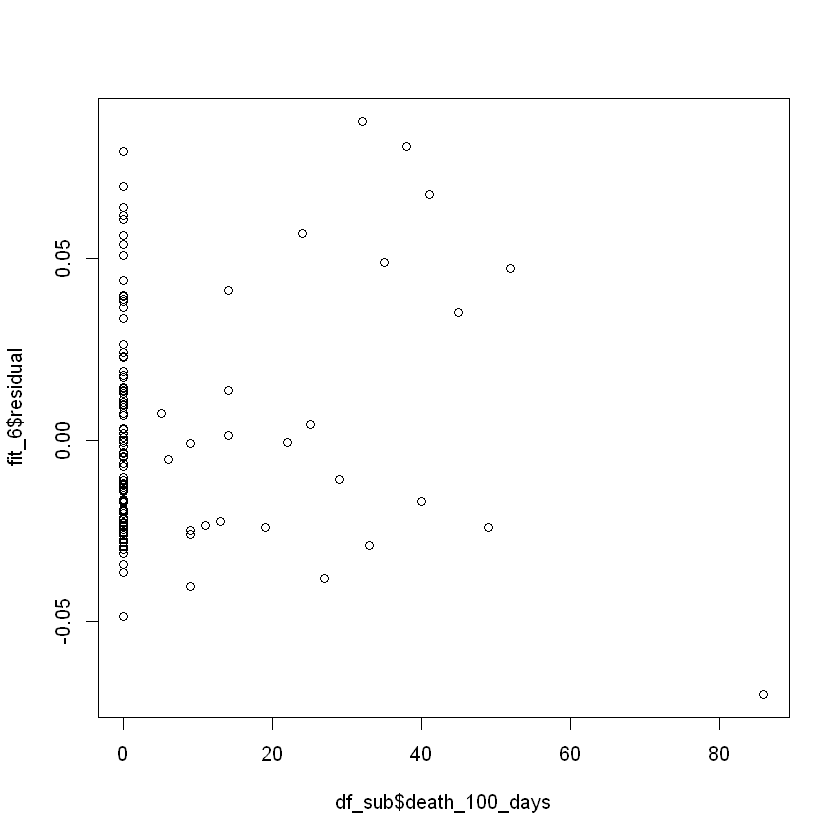

In [211]:
plot(df_sub$death_100_days, fit_6$residual)

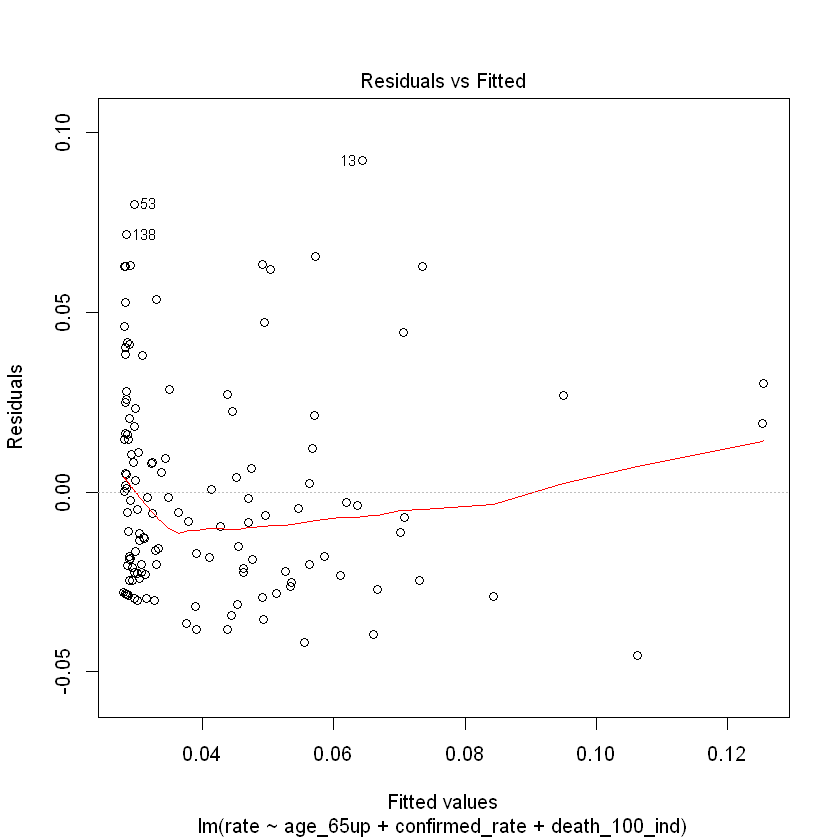

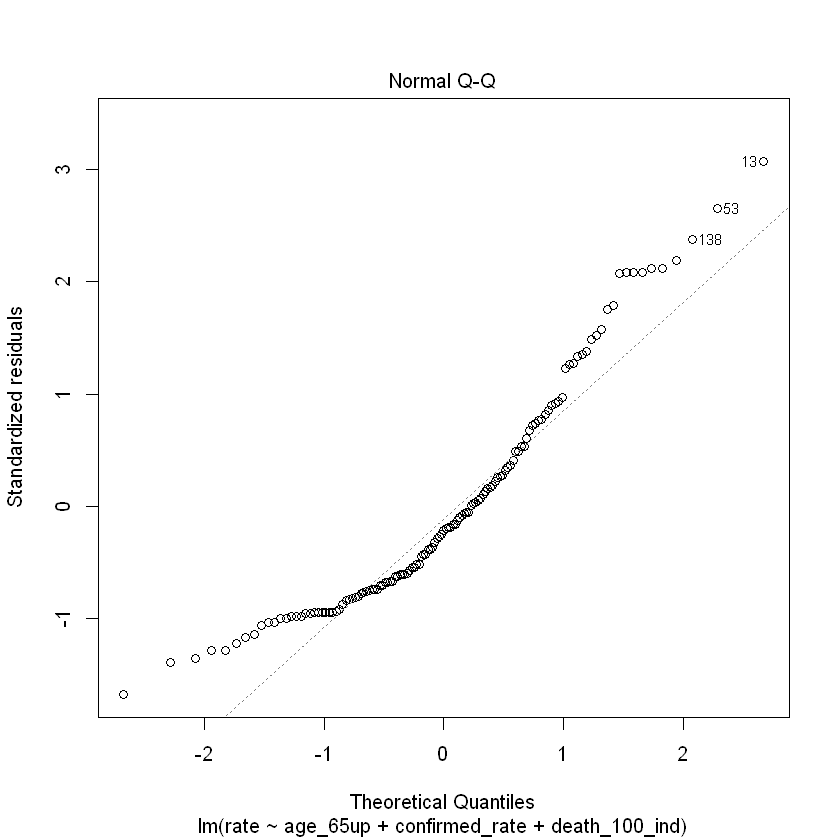

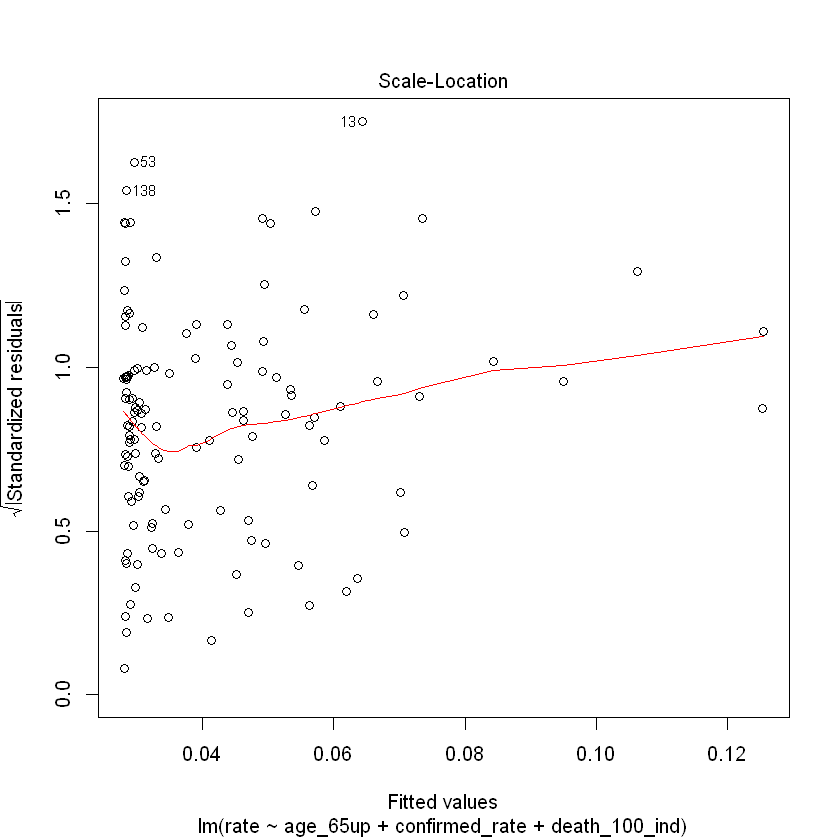

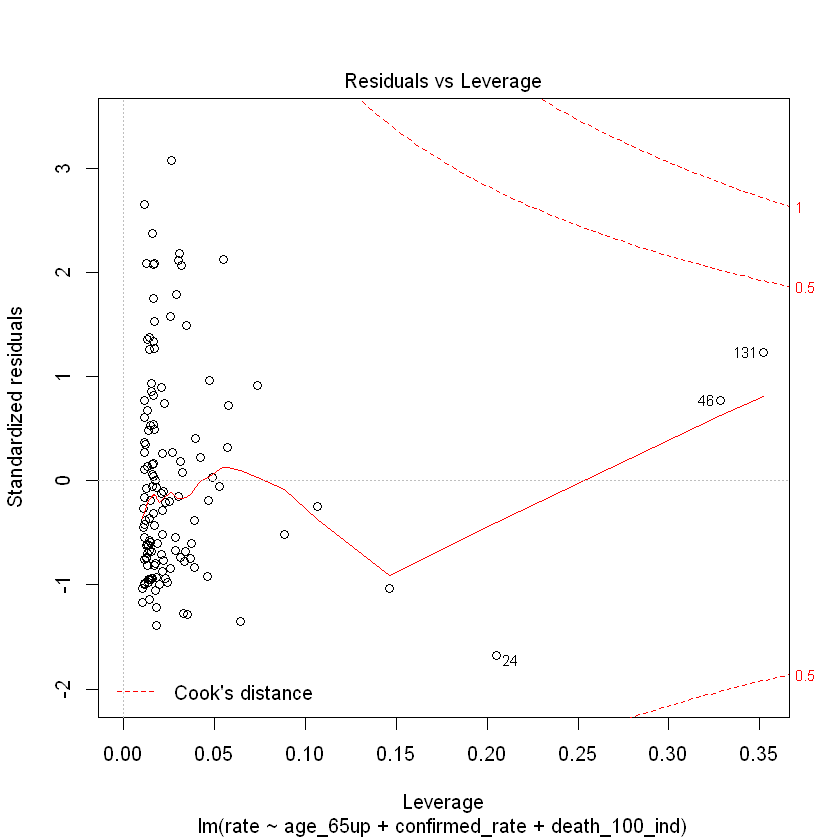

In [293]:
plot(fit_5)

> Violates linearity, constant variance, and normality...

3) Data transformation

In [62]:
df_trans <- df_sub %>%
    filter(rate != 0) %>%
    mutate(rate_sqrt = sqrt(rate),
           age_65up_sqrt = sqrt(age_65up),
           med_bed_log = log(med_bed),
           gov_resp_sqrt_trans = sqrt(max(gov_resp + 1) - gov_resp),
           confirmed_rate_log = log(confirmed_rate),
           nurses_midwives_log = log(nurses_midwives),
           pop_density_log = log(pop_density)) %>%
    select(rate_sqrt, age_65up_sqrt,med_bed_log, gov_resp_sqrt_trans, 
           confirmed_rate_log, nurses_midwives_log, pop_density_log)


In [64]:
# base model
base <- lm(rate_sqrt ~ age_65up_sqrt, df_trans)

analyze_lm(base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.15920379,0.022212834,7.167198,6.199752e-11,1.239950e-10,TRUE
age_65up_sqrt,0.01307724,0.007111616,1.838856,6.834842e-02,6.834842e-02,FALSE


In [65]:
# add med_bed_log to the base model
fit_1 <- lm(rate_sqrt ~ age_65up_sqrt + med_bed_log, df_trans)

analyze_lm(fit_1)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.11424735,0.024212652,4.718498,6.389477e-06,1.916843e-05,TRUE
age_65up_sqrt,0.04022139,0.009851976,4.082571,7.993820e-05,1.199073e-04,TRUE
med_bed_log,-0.04558047,0.012042361,-3.785011,2.397351e-04,2.397351e-04,TRUE


In [66]:
anova(fit_1, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.7872952,NA,NA,NA,NA
123,0.8797463,-1,-0.09245108,14.32631,0.0002397351


> The model with `med_bed_log` is significantly (p-value < 0.05) different from the base model. I could add `med_bed_log` in my final model.

In [67]:
# add pop_density_log to the base model
fit_2 <- lm(rate_sqrt ~ age_65up_sqrt + pop_density_log, df_trans)

analyze_lm(fit_2)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.176441656,0.031506654,5.6001395,1.346061e-07,4.038184e-07,TRUE
age_65up_sqrt,0.013575583,0.007152427,1.8980388,6.005373e-02,9.008059e-02,FALSE
pop_density_log,-0.004340059,0.005616540,-0.7727284,4.411776e-01,4.411776e-01,FALSE


In [68]:
anova(fit_2, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.8754615,NA,NA,NA,NA
123,0.8797463,-1,-0.004284803,0.5971091,0.4411776


> The model with `pop_density` is not significantly (p-value < 0.05) different from the base model. I would not add `pop_density` in my final model.

In [69]:
# add confirmed_rate_log to the base model
fit_3 <- lm(rate_sqrt ~ age_65up_sqrt + confirmed_rate_log, df_trans)

analyze_lm(fit_3)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-0.08133396,0.056008683,-1.452167,1.490221e-01,1.490221e-01,FALSE
age_65up_sqrt,0.03776837,0.008485055,4.451164,1.901691e-05,2.852537e-05,TRUE
confirmed_rate_log,-0.01914078,0.004145178,-4.617600,9.688940e-06,2.852537e-05,TRUE


In [70]:
anova(fit_3, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.7488653,NA,NA,NA,NA
123,0.8797463,-1,-0.130881,21.32223,9.68894e-06


> The model with `confirmed_rate_log` is significantly (p-value < 0.05) different from the base model. I could add `confirmed_rate_log` in my final model.

In [71]:
# add gov_resp_sqrt_trans to the base model
fit_4 <- lm(rate_sqrt ~ age_65up_sqrt + gov_resp_sqrt_trans, df_trans)

analyze_lm(fit_4)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.127543108,0.028504980,4.474415,1.732357e-05,0.0000519707,TRUE
age_65up_sqrt,0.011940880,0.007082542,1.685960,9.435948e-02,0.0943594798,FALSE
gov_resp_sqrt_trans,0.008266881,0.004723564,1.750136,8.260891e-02,0.0943594798,FALSE


In [71]:
anova(fit_4, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132,0.1972090,NA,NA,NA,NA
133,0.2016192,-1,-0.00441024,2.951953,0.08811857


> The model with `gov_resp_sqrt_trans` is not significantly (p-value < 0.05) different from the base model. I would not add `gov_resp_sqrt_trans` in my final model.

In [74]:
# add nurses_midwives_log to the base model
fit_5 <- lm(rate_sqrt ~ age_65up_sqrt + nurses_midwives_log, df_trans)

analyze_lm(fit_5)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.13009127,0.023347479,5.571962,1.531524e-07,4.594573e-07,TRUE
age_65up_sqrt,0.03298721,0.009326207,3.537044,5.730204e-04,8.595306e-04,TRUE
nurses_midwives_log,-0.02841025,0.009005991,-3.154594,2.024121e-03,2.024121e-03,TRUE


In [75]:
anova(fit_5, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122,0.8133979,NA,NA,NA,NA
123,0.8797463,-1,-0.06634837,9.951466,0.002024121


> The model with `nurses_midwives_log` is significantly (p-value < 0.05) different from the base model. I would not add `nurses_midwives_log` in my final model.

In [78]:
# add med_bed_log and nurses_midwives_log to the base model
fit_6 <- lm(rate_sqrt ~ age_65up_sqrt + med_bed_log + nurses_midwives_log, df_trans)

analyze_lm(fit_6)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.11027878,0.02431901,4.534674,1.367161e-05,5.468645e-05,TRUE
age_65up_sqrt,0.04377936,0.01017720,4.301709,3.455772e-05,6.911545e-05,TRUE
med_bed_log,-0.03490020,0.01443350,-2.418000,1.709684e-02,2.279579e-02,TRUE
nurses_midwives_log,-0.01415277,0.01061962,-1.332701,1.851341e-01,1.851341e-01,FALSE


In [80]:
anova(fit_6, fit_1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.7759061,NA,NA,NA,NA
122,0.7872952,-1,-0.01138909,1.776092,0.1851341


In [81]:
# add med_bed_log and confirmed_rate_log to the base model
fit_7 <- lm(rate_sqrt ~ age_65up_sqrt + med_bed_log + confirmed_rate_log, df_trans)

analyze_lm(fit_7)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-0.07937245,0.054303867,-1.461635,1.464334e-01,1.464334e-01,FALSE
age_65up_sqrt,0.05474364,0.010020816,5.462992,2.545043e-07,1.018017e-06,TRUE
med_bed_log,-0.03475098,0.011714801,-2.966416,3.631331e-03,4.841775e-03,TRUE
confirmed_rate_log,-0.01625724,0.004134599,-3.931999,1.408823e-04,2.817647e-04,TRUE


In [83]:
anova(fit_7, fit_1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.6980968,NA,NA,NA,NA
122,0.7872952,-1,-0.0891984,15.46062,0.0001408823


In [84]:
anova(fit_7, fit_3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.6980968,NA,NA,NA,NA
122,0.7488653,-1,-0.05076851,8.799625,0.003631331


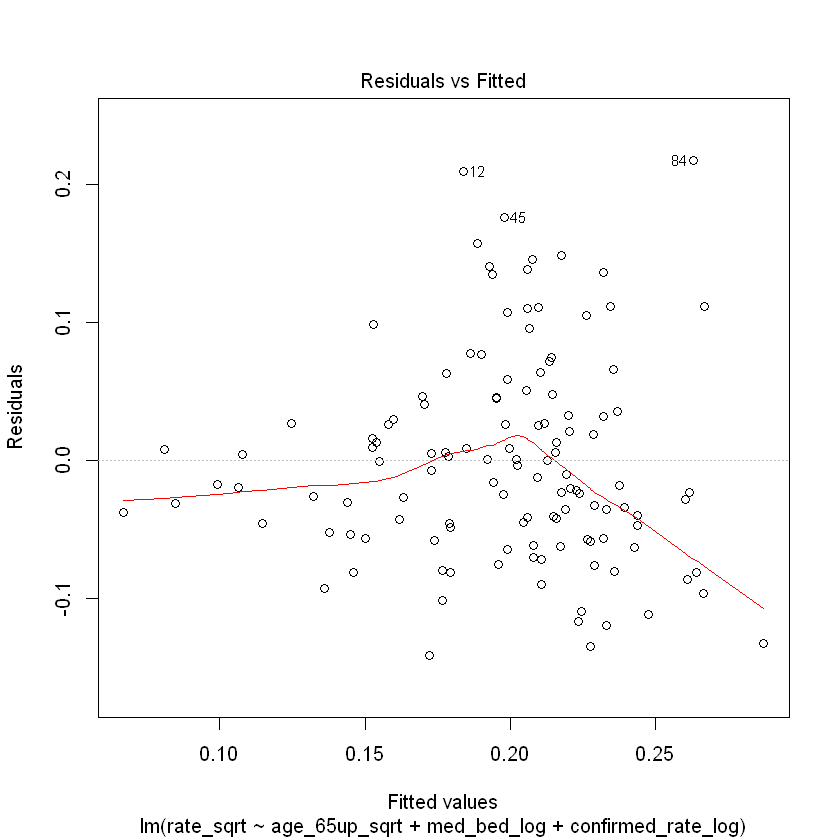

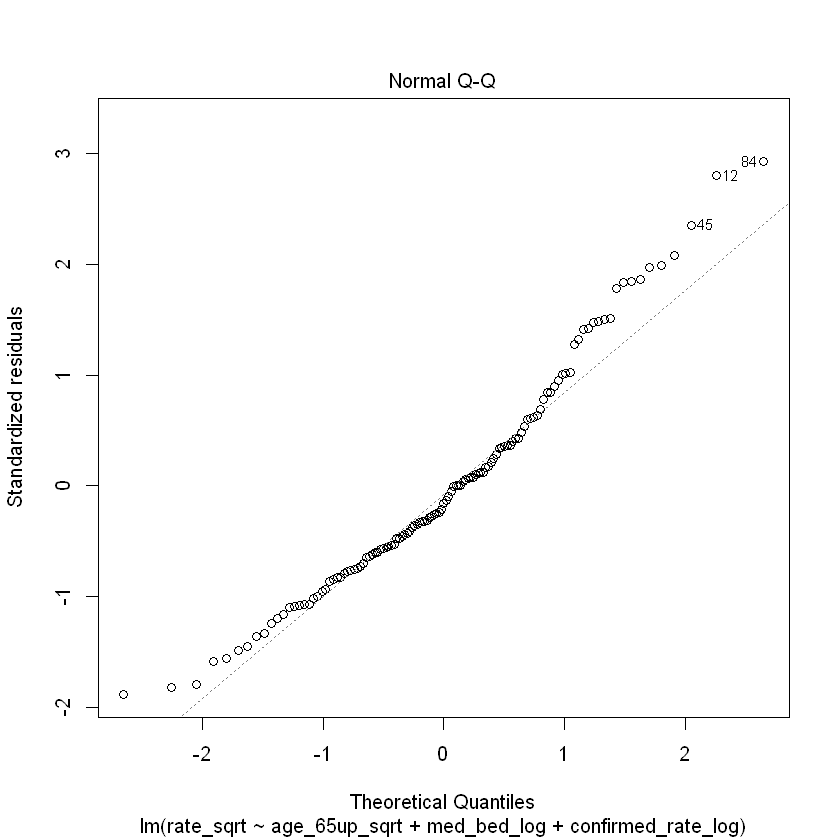

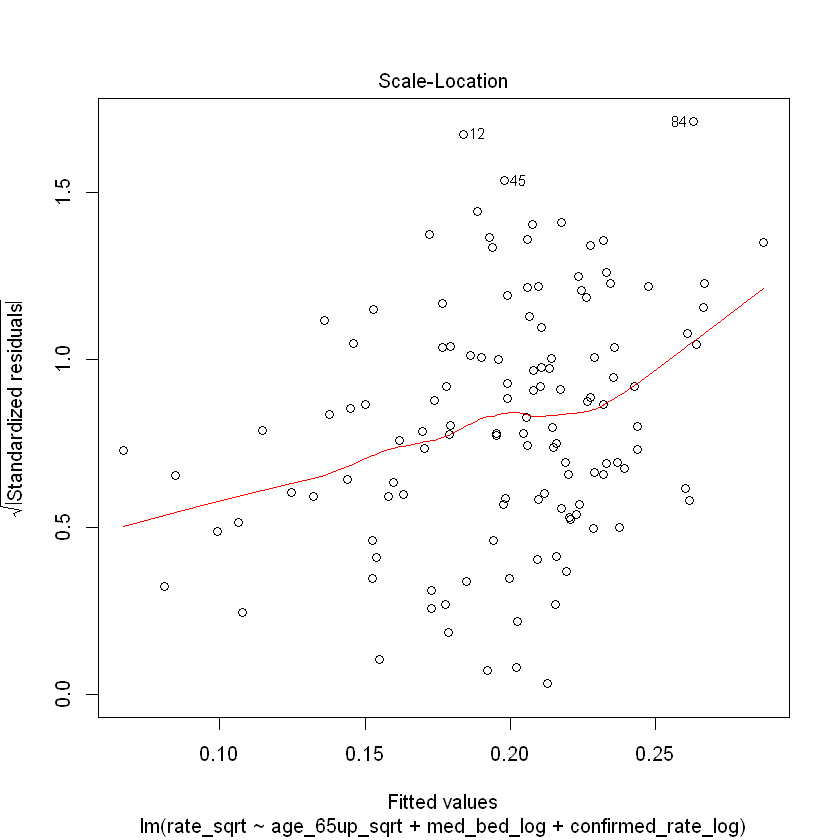

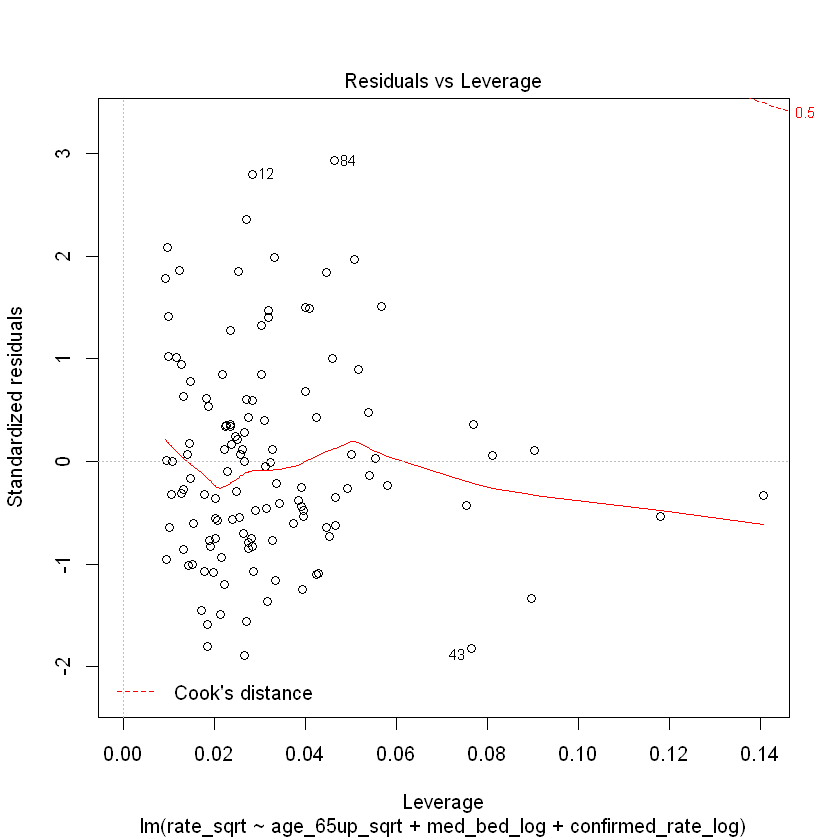

In [85]:
plot(fit_7)

[1] -2

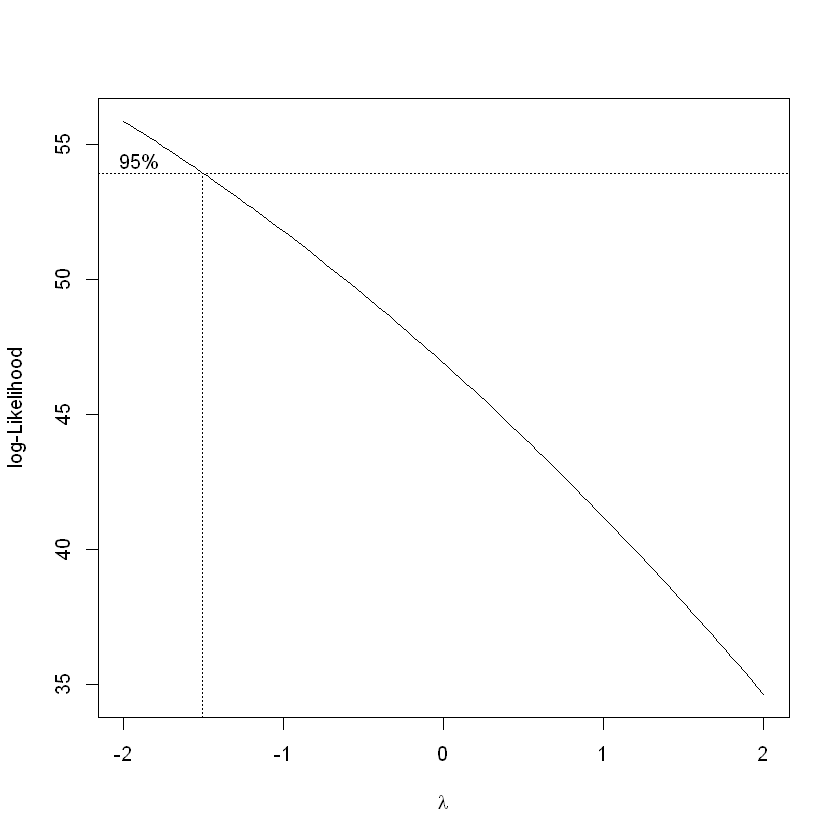

In [309]:
bc = MASS::boxcox(fit)
best_lam = bc$x[which(bc$y == max(bc$y))]
best_lam

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.07162423,0.060590968,1.182094,2.394862e-01,2.394862e-01,FALSE
age_65up_sqrt,0.06945491,0.011180989,6.211876,7.666104e-09,3.066442e-08,TRUE
med_bed_log,-0.04123936,0.013071098,-3.155004,2.025168e-03,2.700224e-03,TRUE
confirmed_rate_log,-0.02157625,0.004613288,-4.676980,7.642687e-06,1.528537e-05,TRUE


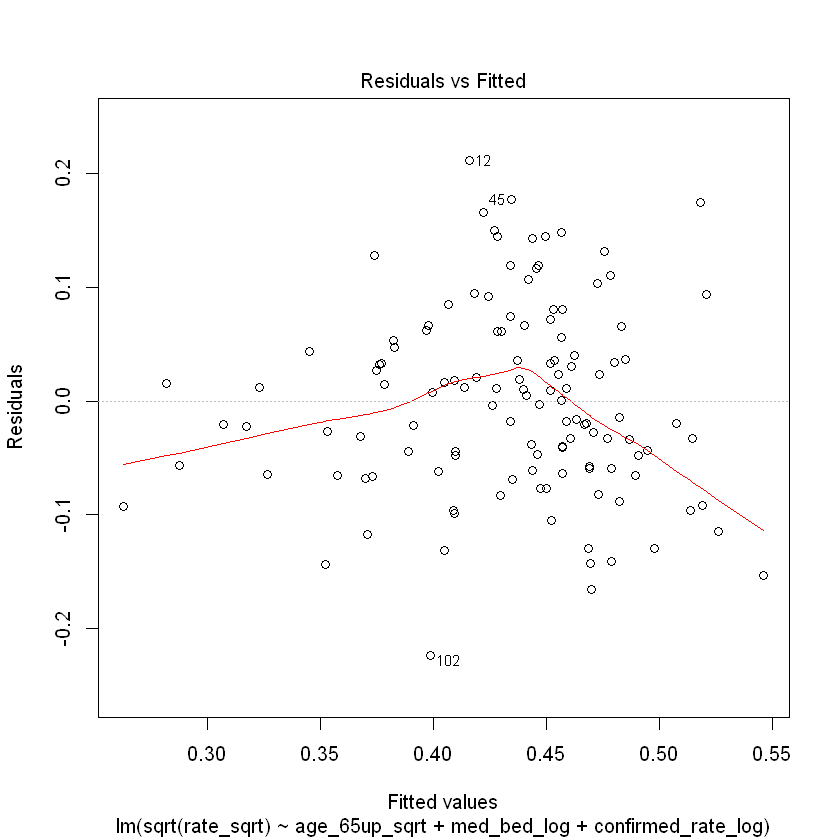

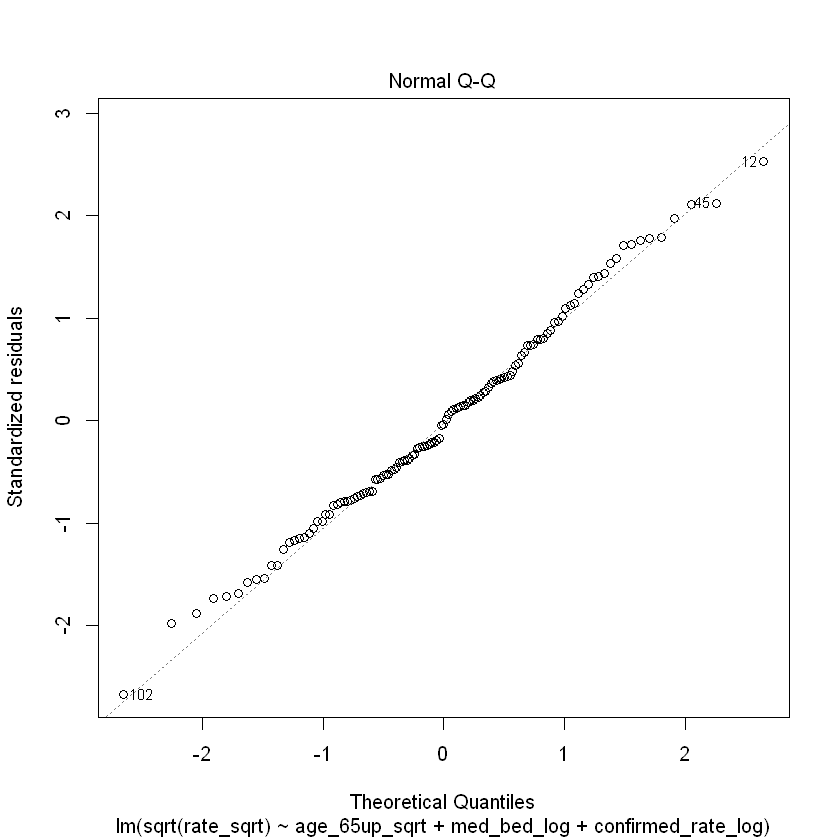

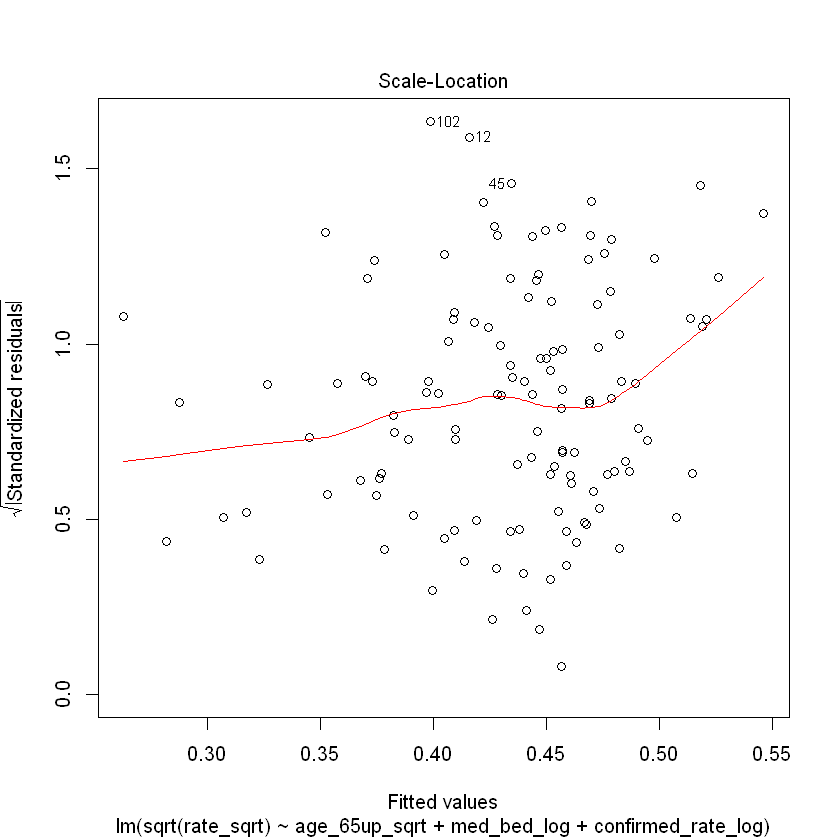

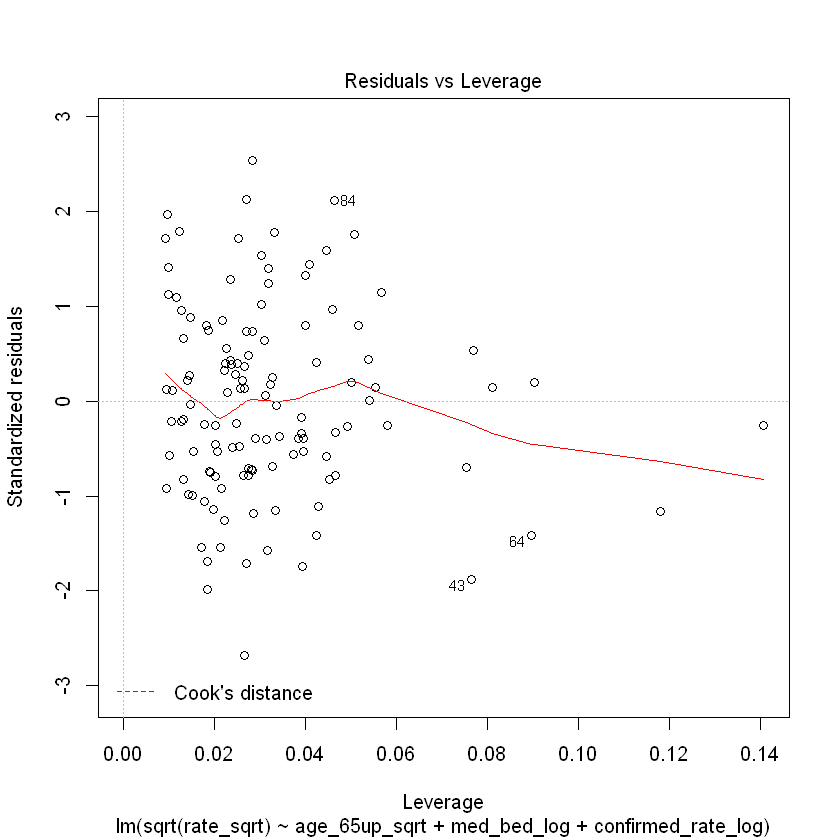

In [93]:
fit_8 <- lm(sqrt(rate_sqrt) ~ age_65up_sqrt + med_bed_log + confirmed_rate_log, df_trans)

analyze_lm(fit_8)

plot(fit_8)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-0.24868439,0.092672220,-2.683484,8.314934e-03,1.039367e-02,TRUE
age_65up_sqrt,0.19386064,0.030369649,6.383368,3.402373e-09,1.701187e-08,TRUE
confirmed_rate_log,-0.06219908,0.010259808,-6.062402,1.597477e-08,3.993691e-08,TRUE
med_bed_log,-0.02754460,0.012592072,-2.187456,3.064785e-02,3.064785e-02,TRUE
age_65up_sqrt:confirmed_rate_log,0.01694398,0.003884689,4.361733,2.745050e-05,4.575083e-05,TRUE


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121,0.8691003,NA,NA,NA,NA
120,0.7501690,1,0.1189313,19.02472,2.74505e-05


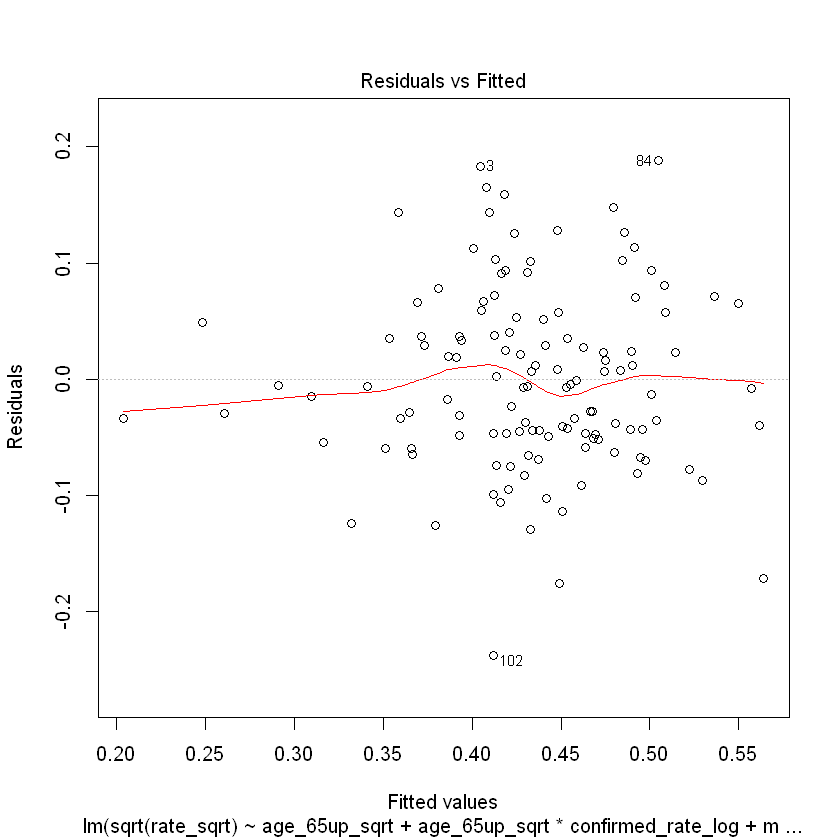

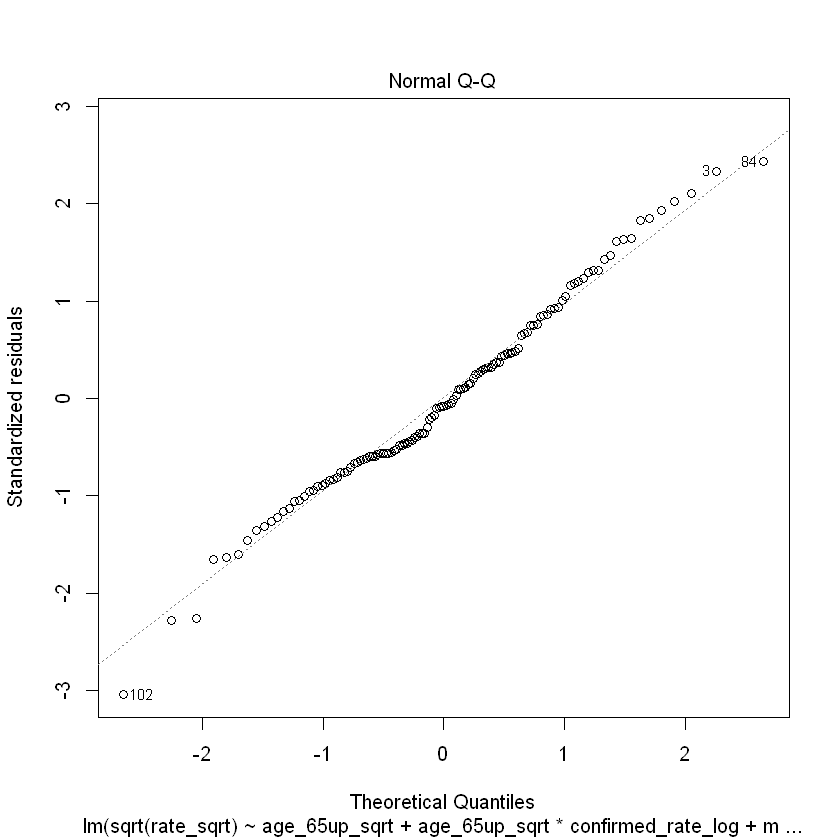

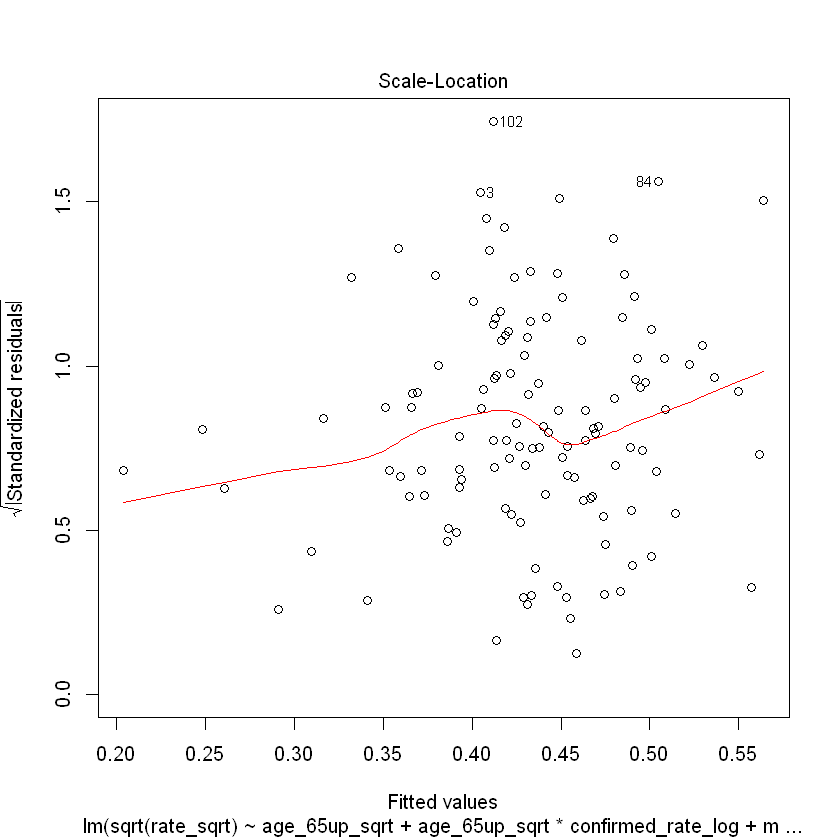

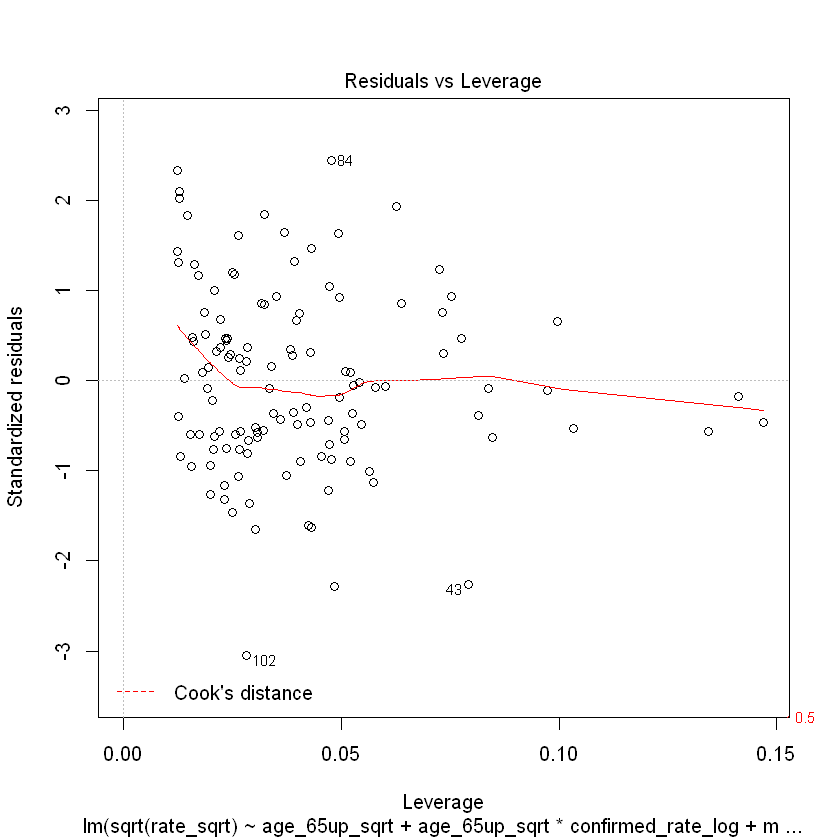

In [94]:
fit_9 <- lm(sqrt(rate_sqrt) ~ age_65up_sqrt +age_65up_sqrt*confirmed_rate_log + 
                med_bed_log + confirmed_rate_log, df_trans)

analyze_lm(fit_9)

anova(fit_8, fit_9)

plot(fit_9)

3) GLM

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.10521183,0.022462543,4.683879,7.035401e-06,2.814161e-05,TRUE
log(age_65up),0.01331214,0.004036965,3.297562,1.260339e-03,1.260339e-03,TRUE
log(med_bed),-0.01532122,0.003436917,-4.457838,1.779298e-05,3.558596e-05,TRUE
log(death_100_ind + 1),-0.10563603,0.029146710,-3.624287,4.155627e-04,5.540836e-04,TRUE


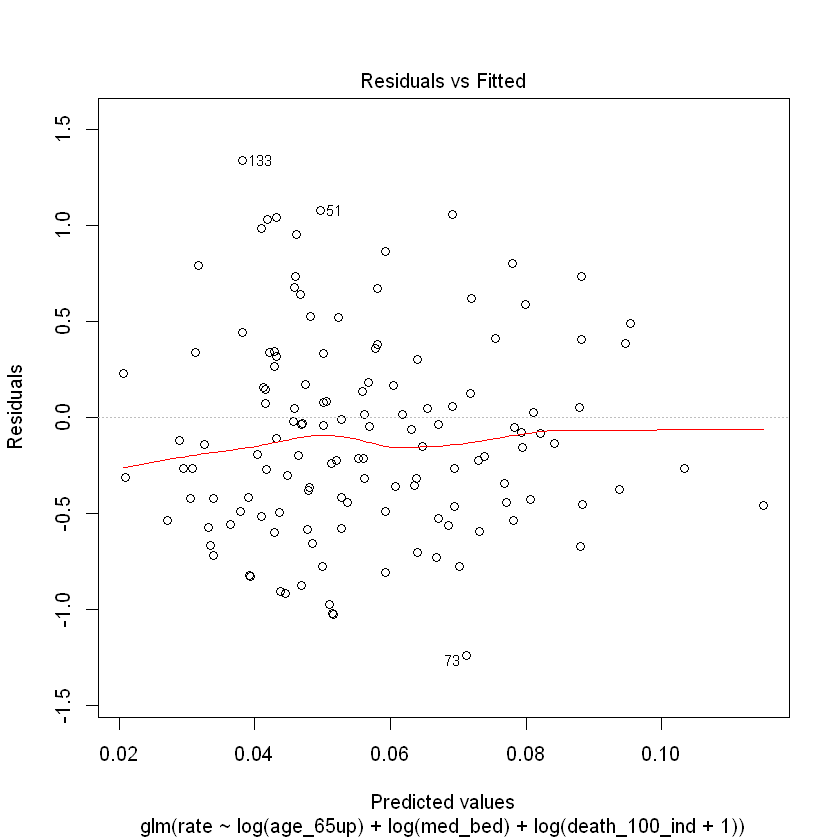

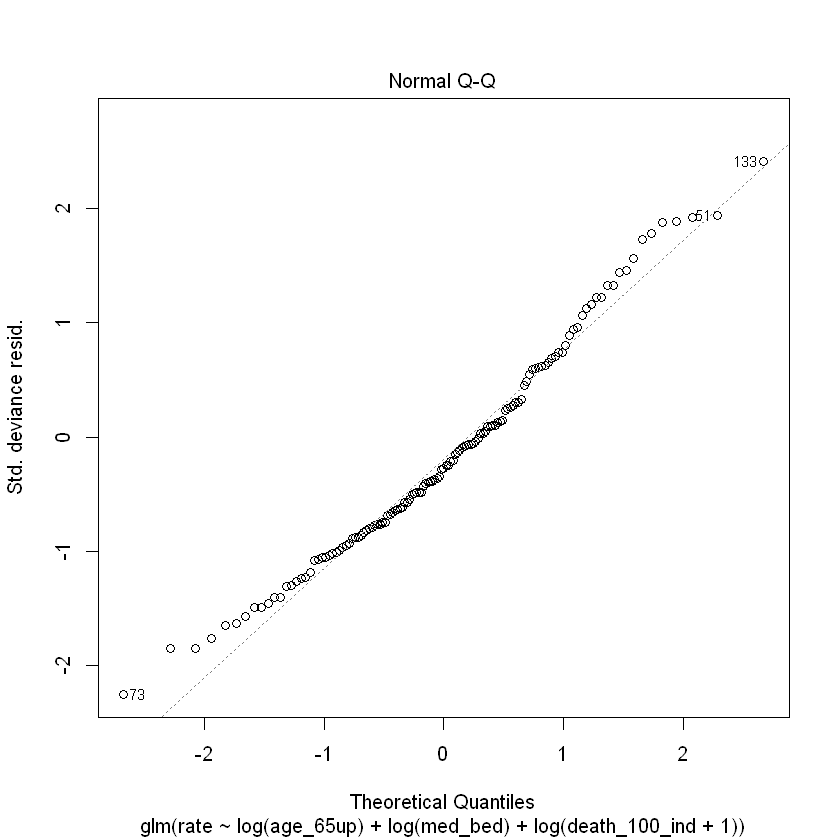

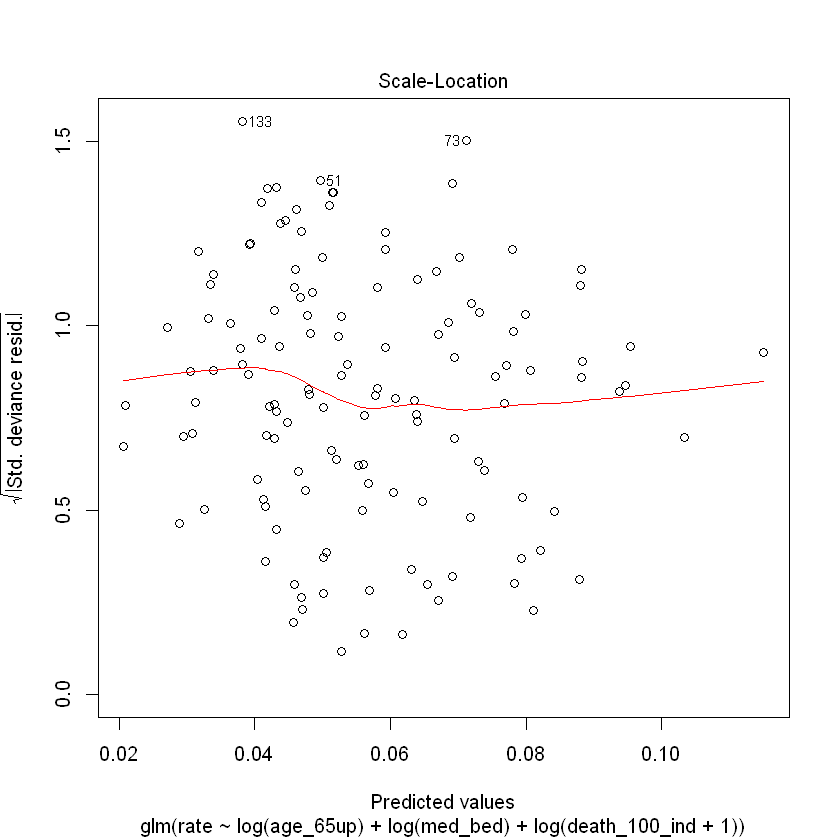

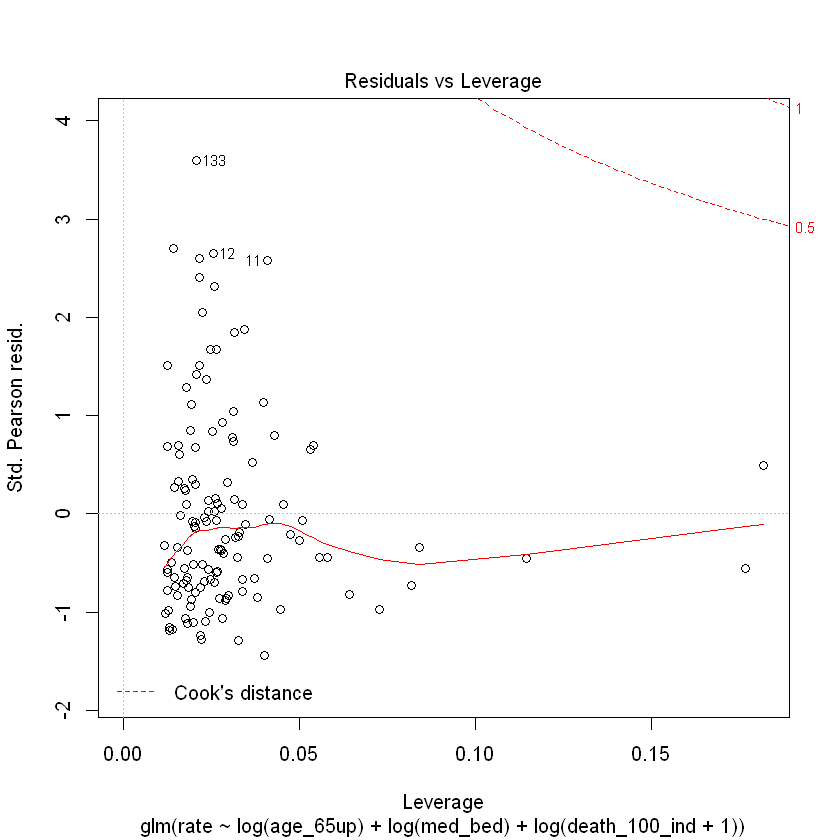

In [433]:

fit <- df_sub %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    glm(rate ~ log(age_65up) + log(med_bed) + log(death_100_ind+1), family = Gamma(link = "identity"), .)
results <- analyze_lm(fit)
results
plot(fit)

4) Bootstrapping

In [438]:
set.seed(12345)
N <- 1000

fits <- df_sub %>%
    mutate(rate = (rate*(133 -1) + 2)/133) %>%
    rsample::bootstraps(N) %>% 
    mutate(lm = map(splits, ~ glm(rate ~ log(age_65up) + log(med_bed) + log(death_100_ind+1), 
                                  family = Gamma(link = "identity"), .)),
           tidy = map(lm, broom::tidy)) %>% 
    select(-splits, -lm) %>% 
    unnest(tidy)



In [ ]:

plot_results <-  function (fits, label, obs){
    boot_fits <- fits %>% 
        filter(term == label)
    
    t_star <- tibble(t_star = (boot_fits$estimate - obs$estimate)/boot_fits$std.error)
    pval_boot <- (1 + sum(abs(t_star) > abs(obs$statistic)))/(N+1)
    hist <- t_star %>% 
        ggplot(aes(t_star)) +
            geom_histogram(bins = 30) +
            geom_vline(xintercept = obs$statistic, color = "red")
    
    return(list(pval_boot, hist))
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[[1]]
[1] 0.000999001

[[2]]


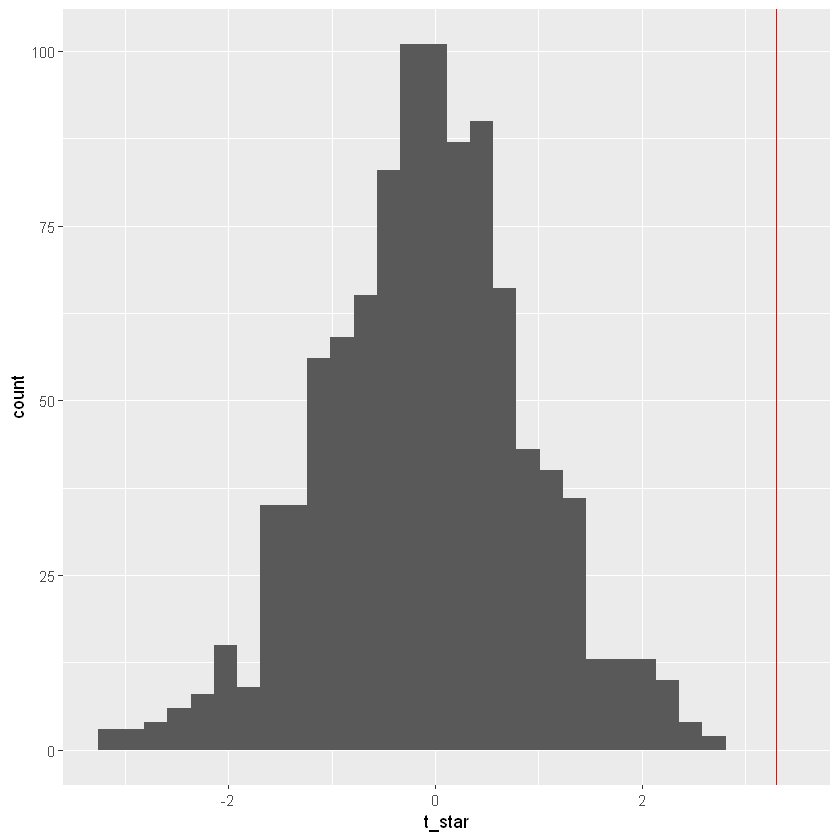

In [439]:
age_65up_fits <- plot_results(fits, "log(age_65up)", results %>% filter(term == "log(age_65up)"))
age_65up_fits

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[[1]]
[1] 0.000999001

[[2]]


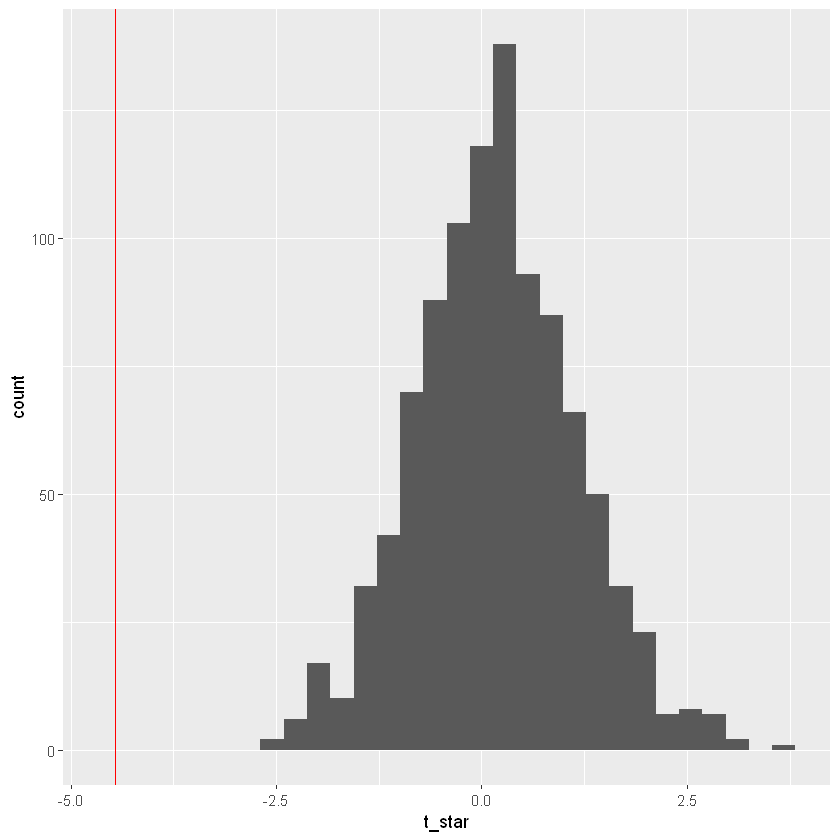

In [440]:
med_bed_fits <- plot_results(fits, "log(med_bed)", results %>% filter(term == "log(med_bed)"))
med_bed_fits

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[[1]]
[1] 0.001998002

[[2]]


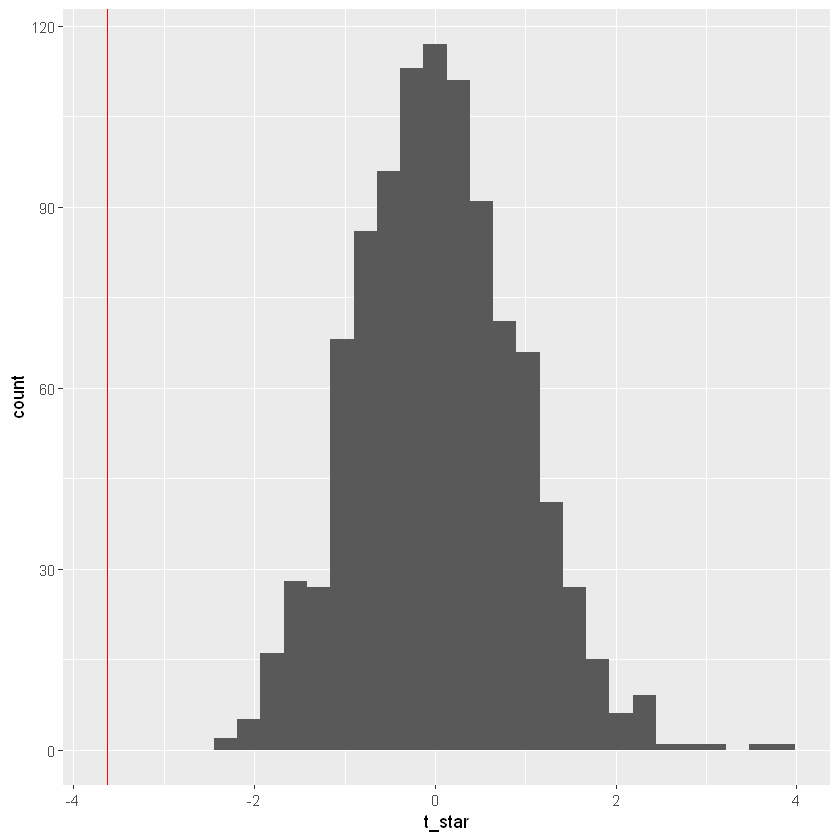

In [441]:
death_100_ind_fits <- plot_results(fits, "log(death_100_ind + 1)", results %>% filter(term == "log(death_100_ind + 1)"))
death_100_ind_fits

#### II. Stratified analysis

In [165]:
rate_75 <- quantile(covid19$rate, 0.75, na.rm = TRUE, names = FALSE)
rate_75

[1] 0.05524184

In [166]:
sum(df_cp$rate > rate_75, na.rm = TRUE)

[1] 39

In [109]:
head(df_sub)

,rate,age_65up,med_bed,pop_density,nurses_midwives,confirmed_rate,gov_resp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03347035,2.584927,0.5,56.937760,0.3200,4.581358e-05,73.55
2,0.03804348,13.744736,2.9,104.612263,3.5998,2.567702e-04,88.36
3,0.12283196,6.362497,1.9,17.730075,2.2400,8.328513e-05,82.42
5,0.07407407,2.216374,0.8,24.713052,1.3123,8.763456e-07,86.77
6,0.04921309,11.117789,5.0,16.258510,2.5800,8.996617e-05,90.21
7,0.01234935,15.656475,3.8,3.249129,12.6612,2.690263e-04,68.26


In [179]:
med_bed_bin <- cut(df_sub$med_bed, breaks = c(0, quantile(df_sub$med_bed, 1/2), Inf))
summary(med_bed_bin)

(0,2.3] (2.3,Inf] 
       69        66

In [172]:
pop_density_bin <- cut(df_sub$pop_density, breaks = c(0, quantile(df_sub$pop_density, (1:2)/3), Inf))
summary(pop_density_bin)

(0,49.4] (49.4,124]  (124,Inf] 
        45         45         45

In [173]:
nurses_midwives_bin <- cut(df_sub$nurses_midwives, breaks = c(0, quantile(df_sub$nurses_midwives, (1:2)/3), Inf))
summary(nurses_midwives_bin)

(0,1.42] (1.42,5.71]  (5.71,Inf] 
         45          45          45

In [180]:
confirmed_rate_bin <- cut(df_sub$confirmed_rate, breaks = c(0, quantile(df_sub$confirmed_rate, 1/2), Inf))
summary(confirmed_rate_bin)

(0,0.000124] (0.000124,Inf] 
            68             67

In [175]:
gov_resp_bin <- cut(df_sub$gov_resp, breaks = c(0, quantile(df_sub$gov_resp, (1:2)/3), Inf))
summary(gov_resp_bin)

(0,78.8] (78.8,88.6]  (88.6,Inf] 
         45          46          44

In [193]:
df_bin <- tibble(med_bed_bin = med_bed_bin,
                 pop_density_bin = pop_density_bin,
                 nurses_midwives_bin = nurses_midwives_bin,
                 confirmed_rate_bin = confirmed_rate_bin,
                 gov_resp_bin = gov_resp_bin)
df_bin$age_65up <- df_sub$age_65up
df_bin$rate <- df_sub$rate
df_bin <- df_bin %>%
    mutate(rate_cat = factor(if_else(rate > rate_75, 1, 0)))
head(df_bin)

med_bed_bin,pop_density_bin,nurses_midwives_bin,confirmed_rate_bin,gov_resp_bin,age_65up,rate,rate_cat
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
"(0,2.3]","(49.4,124]","(0,1.42]","(0,0.000124]","(0,78.8]",2.584927,0.03172867,0
"(2.3,Inf]","(49.4,124]","(1.42,5.71]","(0.000124,Inf]","(78.8,88.6]",13.744736,0.04000000,0
"(0,2.3]","(0,49.4]","(1.42,5.71]","(0,0.000124]","(78.8,88.6]",6.362497,0.11975884,1
"(0,2.3]","(0,49.4]","(0,1.42]","(0,0.000124]","(78.8,88.6]",2.216374,0.07407407,1
"(2.3,Inf]","(0,49.4]","(1.42,5.71]","(0,0.000124]","(88.6,Inf]",11.117789,0.05015750,0
"(2.3,Inf]","(0,49.4]","(5.71,Inf]","(0.000124,Inf]","(0,78.8]",15.656475,0.01319692,0


In [170]:
summary(df_bin)

    med_bed_bin   pop_density_bin  nurses_midwives_bin      confirmed_rate_bin
 (0,2.3]  :69   (0,49.4]  :45     (0,1.42]   :45       (0,0.000124]  :68      
 (2.3,Inf]:66   (49.4,124]:45     (1.42,5.71]:45       (0.000124,Inf]:67      
                (124,Inf] :45     (5.71,Inf] :45                              
                                                                              
                                                                              
                                                                              
      gov_resp_bin    age_65up      rate_cat
 (0,78.8]   :45    Min.   : 1.085   0:98    
 (78.8,88.6]:46    1st Qu.: 3.741   1:37    
 (88.6,Inf] :44    Median : 7.157           
                   Mean   : 9.336           
                   3rd Qu.:15.000           
                   Max.   :27.576           

In [182]:
df_bin %>%
    group_by(med_bed_bin, confirmed_rate_bin) %>%
    summarize(n = n())

med_bed_bin,confirmed_rate_bin,n
<fct>,<fct>,<int>
"(0,2.3]","(0,0.000124]",52
"(0,2.3]","(0.000124,Inf]",17
"(2.3,Inf]","(0,0.000124]",16
"(2.3,Inf]","(0.000124,Inf]",50


In [194]:
df_bin %>%
    filter(med_bed_bin == "(0,2.3]", confirmed_rate_bin == "(0,0.000124]") %>%
#     glm(rate_cat ~ age_65up, ., family = "binomial") %>%
    lm(rate ~ age_65up, .) %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.0525482896,0.013776109,3.81445089,0.0003762625
age_65up,-0.0002679655,0.002779743,-0.09639937,0.9235887482


In [195]:
df_bin %>%
    filter(med_bed_bin == "(0,2.3]", confirmed_rate_bin == "(0.000124,Inf]") %>%
#     glm(rate_cat ~ age_65up, ., family = "binomial") %>%
    lm(rate ~ age_65up, .) %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.002024505,0.013458798,0.1504224,0.88243547
age_65up,0.004033686,0.002048089,1.9694875,0.06765233


In [196]:
df_bin %>%
    filter(med_bed_bin == "(2.3,Inf]", confirmed_rate_bin == "(0,0.000124]") %>%
#     glm(rate_cat ~ age_65up, ., family = "binomial") %>%
    lm(rate ~ age_65up, .) %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.008359772,0.0088544166,0.9441359,0.3611099
age_65up,0.001535178,0.0009055709,1.6952594,0.1121422


In [198]:
df_bin %>%
    filter(med_bed_bin == "(2.3,Inf]", confirmed_rate_bin == "(0.000124,Inf]") %>%
#     glm(rate_cat ~ age_65up, ., family = "binomial") %>%
    lm(rate ~ age_65up, .) %>%
    broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.026907752,0.017501321,-1.537470,1.307448e-01
age_65up,0.004603878,0.001048214,4.392116,6.162242e-05


## 8. Summary and conclusions
